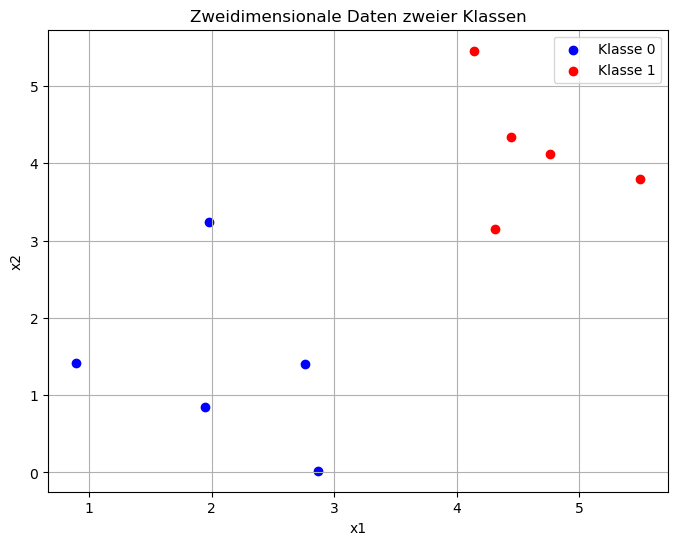

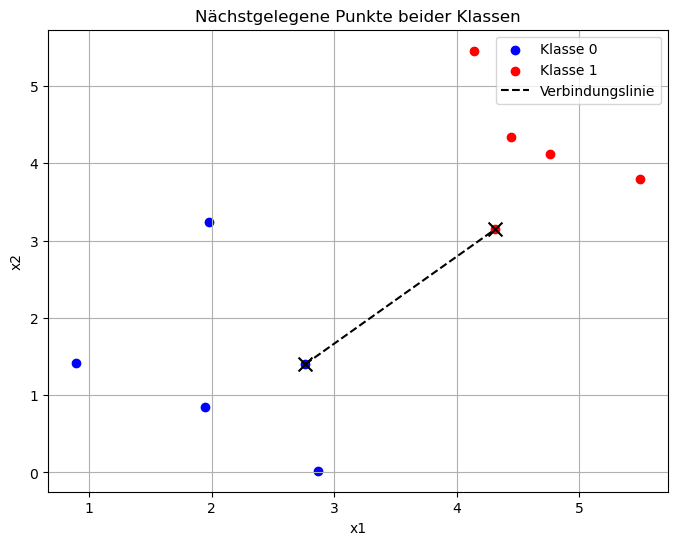

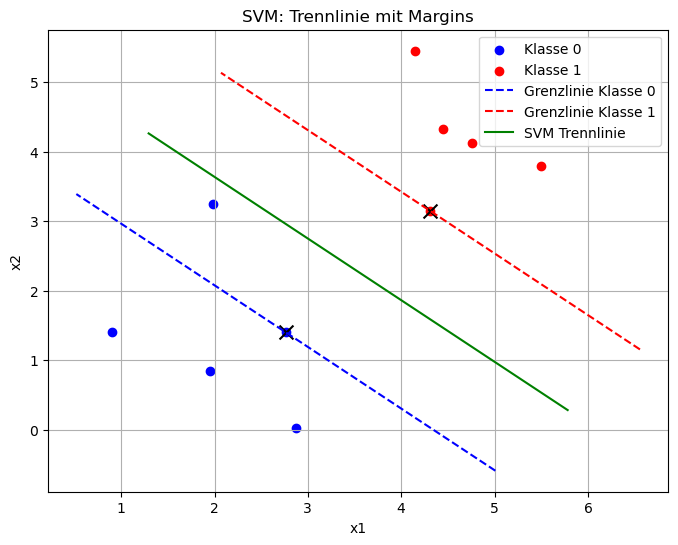

Gleichung der SVM-Trennlinie:
-1.75*x + 1.55*y + 2.66 = 0


In [2]:
# ---------------------------- SVM-Vereinfachung: Didaktischer Code ----------------------------
# Ziel: Erklärung der Support Vector Machine (SVM) Idee mit einfacher Geometrie
# Wir berechnen zwei Trennlinien entlang der nächstgelegenen Punkte beider Klassen
# und berechnen dann eine optimale Trennlinie dazwischen.

import numpy as np
import matplotlib.pyplot as plt

# ---------------------------- 1. Datenerstellung ----------------------------
np.random.seed(0)  # Reproduzierbarkeit
klasse_0 = np.random.randn(5, 2) + np.array([1, 1])   # Klasse 0 nahe Punkt (1,1)
klasse_1 = np.random.randn(5, 2) + np.array([4, 4])   # Klasse 1 nahe Punkt (4,4)

data = np.vstack((klasse_0, klasse_1))               # Gesamtdaten (10x2)
labels = np.array([0]*5 + [1]*5)                      # Zielklassen

# ---------------------------- 2. Visualisierung der Daten ----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(klasse_0[:, 0], klasse_0[:, 1], color='blue', label='Klasse 0')
plt.scatter(klasse_1[:, 0], klasse_1[:, 1], color='red', label='Klasse 1')
plt.title('Zweidimensionale Daten zweier Klassen')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------- 3. Finden der nächstgelegenen Punkte ----------------------------
min_dist = float('inf')
punkt_a, punkt_b = None, None
for p0 in klasse_0:
    for p1 in klasse_1:
        dist = np.linalg.norm(p0 - p1)
        if dist < min_dist:
            min_dist = dist
            punkt_a, punkt_b = p0, p1

# Visualisierung der nächstgelegenen Punkte
plt.figure(figsize=(8, 6))
plt.scatter(klasse_0[:, 0], klasse_0[:, 1], color='blue', label='Klasse 0')
plt.scatter(klasse_1[:, 0], klasse_1[:, 1], color='red', label='Klasse 1')
plt.plot([punkt_a[0], punkt_b[0]], [punkt_a[1], punkt_b[1]], 'k--', label='Verbindungslinie')
plt.scatter([punkt_a[0], punkt_b[0]], [punkt_a[1], punkt_b[1]], color='black', marker='x', s=100)
plt.title('Nächstgelegene Punkte beider Klassen')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------- 4. Berechnung der Trennlinien ----------------------------
mittelpunkt = (punkt_a + punkt_b) / 2
richtung = punkt_b - punkt_a
normalvektor = np.array([-richtung[1], richtung[0]])

# Funktion zur Erzeugung einer Linie entlang eines Vektors
def linie_durch_punkt_und_richtung(startpunkt, richtung, farbe, label):
    linie_x, linie_y = [], []
    for t in [-3, 3]:
        punkt = startpunkt + t * richtung / np.linalg.norm(richtung)
        linie_x.append(punkt[0])
        linie_y.append(punkt[1])
    plt.plot(linie_x, linie_y, farbe, label=label)

# ---------------------------- 5. Visualisierung aller drei Trennlinien ----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(klasse_0[:, 0], klasse_0[:, 1], color='blue', label='Klasse 0')
plt.scatter(klasse_1[:, 0], klasse_1[:, 1], color='red', label='Klasse 1')
plt.scatter([punkt_a[0], punkt_b[0]], [punkt_a[1], punkt_b[1]], color='black', marker='x', s=100)

# Linie durch Punkt A (Support-Vektor Klasse 0)
linie_durch_punkt_und_richtung(punkt_a, normalvektor, 'b--', 'Grenzlinie Klasse 0')

# Linie durch Punkt B (Support-Vektor Klasse 1)
linie_durch_punkt_und_richtung(punkt_b, normalvektor, 'r--', 'Grenzlinie Klasse 1')

# Mittlere Trennlinie (SVM Margin)
linie_durch_punkt_und_richtung(mittelpunkt, normalvektor, 'g-', 'SVM Trennlinie')

plt.title('SVM: Trennlinie mit Margins')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------- 6. Gleichung der Trennlinie ----------------------------
a, b = normalvektor
c = -(a * mittelpunkt[0] + b * mittelpunkt[1])

print("Gleichung der SVM-Trennlinie:")
print(f"{a:.2f}*x + {b:.2f}*y + {c:.2f} = 0")